###### A1
# Somaye Farhadi

__IDS1__

Please process and analyze the following data and compose a data story for each of the following sections. A good balance of documented code, visualization, and clarifiying prose is desired. Please submit the completed project via email.

__Semantic Scholar:__
Semantic Scholar is a search service for academic journal articles with a search API. Semantic Scholar made available a subset of the full corpus as its Open Research Corpus.
Requirements:

 -  Please use ONLY data from s2-corpus-04.gz and s2-corpus-06.gz of the Open Research Corpus (Version: 2018-05-02).
 -  You are allowed to use the Semantic Scholar search API to explore the data set and test ideas. However, your solutions cannot make any calls to the search API.
 -  Please use any tools, software, or services you need to tell data stories. However, CSET will not reimburse you on costs incurred for completing this project.

__Author Graph:__
Construct an author graph up to "two-neighbors" starting with publication ID 22720d75b8c73afd3bf4917fd5512dcc11e19885 from the data subset that meets the requirements of this section. In other words, starting with an author of publication ID 22720d75b8c73afd3bf4917fd5512dcc11e19885, this author graph should contain all of the author's co-authors as well as co-authors of each co-author.
What do you find interesting about this graph?

__Publication Graph:__
Construct a publication graph based on publications associated with the author graph above. This publication graph will be incomplete, because you are working with only the data subset that meets the requirements of this section. You don't need to retrieve publication data beyond the subset you're required to work with .
What do you find interesting about this graph?

__Other Data Stories:__
Please feel free to implement one idea that tells an interesting data story using Semantic Scholar Open Research Corpus.

__Scalability:__
How scalable is the solution?
_______________________________________________________________________

The following code is structured as follows:

- First, a class is definied which containes methods for various applications. These methods are for uploading data, query on various data fields (specifically, publication ID's and author ID's), network analysis, and data visualization.

- Second, the methods are implemented on a sample data set.

- Finally, some insights about the data are provided

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from itertools import chain
import itertools
import networkx as nx
import glob
import math
import collections
import re

__Uploading data stored in local drive.__ One could alternatively work on cloud data without downloading and locally storing them. However, for the scale of this problem, this method is sufficient and optimum:

In [2]:
#Change the following line to the folder location where the file is stored
drct = '/home/somayeh/Documents/Georgetown_CSET_assignment/'
names = glob.glob(drct+'*.json')
print(names)

['/home/somayeh/Documents/Georgetown_CSET_assignment/s2_s2-corpus-04.json', '/home/somayeh/Documents/Georgetown_CSET_assignment/s2_s2-corpus-06.json']


__Defining the class which contains methods for data analysis and visualization:__

In [3]:
# The class "Corpus_Graph_object" is defined to incorporate methods used for graph analysis. 

class Corpus_Graph_object:
    
    def __init__(self, corpusFile, val):
        self.corpusFile = corpusFile
        self.val1 = val+1
        self.val2 = val+2

    
    # This method loads the data file (which is stored as .json), and returns a 
    # pandas.DataFrame which contains all Publication_ID's in each row, and Author_ID
    # associated with each publication.
    def data_load(self):
        file = self.corpusFile
        sample_size = sum(1 for line in open(file))
        index = range(0,sample_size)
        df = pd.DataFrame(index=index)
        with open(file) as fn:  
            lncnt = 0
            ID=[]; Author_ID = [] ; year =[] ; entities = []
            while ((lncnt<sample_size)):  
                ln = fn.readline()
                lncnt += 1
                d = json.loads(ln)
                ID.append(d['id'])
                authorID=[]
                for i in range(0,len(d['authors'])):
                    authorID.append (''.join(d['authors'][i]['ids']))
                Author_ID.append(authorID)    
        df['Publication_ID'] = ID    
        df['Authors_ID'] = Author_ID
        return(df)

    
    def data_load2(self):
        file = self.corpusFile
        sample_size = sum(1 for line in open(file))
        index = range(0,sample_size)
        df = pd.DataFrame(index=index)
        with open(file) as fn:  
            lncnt = 0
            ID=[]; Author_ID = [] ; year =[] ; entities = []
            while ((lncnt<sample_size)):  
                ln = fn.readline()
                lncnt += 1
                d = json.loads(ln)
                ID.append(d['id'])
                entities.append(d['entities'])
                try:
                    year.append(d['year'])
                except KeyError:
                    year.append(-100)
                authorID=[]
                for i in range(0,len(d['authors'])):
                    authorID.append (''.join(d['authors'][i]['ids']))
                Author_ID.append(authorID)    
        df['Publication_ID'] = ID    
        df['Authors_ID'] = Author_ID
        df['Year'] = year
        df['Entities'] = entities
        return(df)
    
    
    # Method to find all unique author ID's for the DataFrame['Authors_ID'] column. 
    def unique_authors(self, df):
        unique_authors = list(chain.from_iterable(DF['Authors_ID']))
        return(unique_authors)
    
    def unique_coauthors(self, DF):
        it_all = []
        IDs = []
        for i in range(0,len(DF)):
            if len(DF['Authors_ID'][i])>0:
                L = list(itertools.combinations(DF['Authors_ID'][i], 2))
                it_all.append(L)
                IDs.append(len(L) * list([i]))
        unique_coauthors = list(chain.from_iterable(it_all)) #set(chain.from_iterable(it_all))
        ID = list(chain.from_iterable(IDs))
        return(unique_coauthors, ID)


    # Uses Networkx to build coauthorship network. Nodes are authors. Edges are assigned 
    # between nodes if they have a coauthored publication.
    def Author_network(self, nodes, Links):
        G = nx.Graph()  # initiate a graph
        G.add_nodes_from(list(nodes)) # add nodes to the graph. Here, the nodes are the unique authors
        G.add_edges_from(Links) # adding edge based on coauthorship
        return(G)
    
    # Finds clusters of connected authors in Authorship network G.
    def connected_components_sizes(self, G):
        A=list(nx.connected_components(G))
        N=[]
        for i in range(len(A)):
            N.append(len(list(A[i])))
        return(N)    
    
    # Finds the "two-neighbor" graph for each node (as defined in the description of the assignment.)
    def two_neighbors(self, G, node):
        neighbors_1 = [n for n in G.neighbors(node)]
        neighbors_2 = []
        for i in range(len(neighbors_1)):
            neighbors_2.append([n for n in G.neighbors(neighbors_1[i])])
        neighbors_2 = [y for x in neighbors_2 for y in x]
        two_neighbors = set(neighbors_1+neighbors_2)
        return(neighbors_1,neighbors_2,two_neighbors)
    
    def neighbors_graph(self, DF, unique_coauthors, authors0):
        it0 = list(itertools.combinations(authors0, 2))
        it1 = []
        A = []
        for i in range(0,len(authors0)):
            if len(authors0[i])>0:
                it1.append([item for item in unique_coauthors if authors0[i] in item])
                A.append([unique_coauthors.index(item) for item in unique_coauthors if authors0[i] in item])    
        it1 = list(chain.from_iterable(it1))   
        A = list(chain.from_iterable(A))    
        return(it1 , A)
   


__Creating Class object "corpus":__

In [4]:
# define object corpus
corpus = Corpus_Graph_object(names[0], 1)
corpus2= Corpus_Graph_object(names[1], 2)

In [6]:
# Reading corpus files and storing the Publication and Authors ID in pandas DataFrames.
DF1 = corpus.data_load() 
DF2 = corpus2.data_load() 

# Merging the databases from "s2_s2-corpus-06" and "s2_s2-corpus-04" to create a single DataFrame
DF = pd.concat([DF1,DF2])
# DF = DF1
DF.index = range(0, len(DF.index))

del(DF1, DF2, corpus2)
# saves the DataFrame as .pickle file
# DF.to_pickle(drct+'DATA.pickle')
#del(DF1, DF2, DF, corpus, corpus2)

In [7]:
# # Sanity Check: Let's check how Authors-Publications DataFrame looks like:
# DF2 = pd.read_pickle(drct+'DATA.pickle')
# DF =DF2.drop(['Year', 'Entities'],  axis='columns')
# del(DF2)
print(len(DF))  # Expected to have 2000000 rows
DF.head()   # view of data table structure


2000000


,Publication_ID,Authors_ID
0,6e338f498db8188143a13122f7e28dbcd3f9c4b5,[]
1,cebafb82d29a69e45a781025dac8e253459295ab,"[30027983, 1930341, 5023784]"
2,73542bcb451246bbf6d8ae553b883abf33afdc07,[37738470]
3,8abba829740252c8c842ff159c9835a96fd97035,[4999586]
4,10b63603fe7e4ba0737d8acb59a0a6b7d8901788,"[39292995, 1698907, 37067093, 31062003]"


__Network Analysis:__ Now we can create a network of publications based on coauthorship. Here, I have used Python-based library _Networkx_ to create the collaboration network. There are other options like _igraph_ which is much faster (and more efficient if we are dealing with larger data). However, for the purpose of this problem, Networkx is sufficient enough and more user-friendly.

In the following block, I call a method defined in class object to create the graph __G__ (the authorship network). Note that the nodes of G are the unique authors (extracted from the entire database). If two authors share a publication, there is a link (edge) between two nodes associated with the two authors.
A more complex version of this network could incorporate "weighted edges", where each edge strength is associated with frequency of coauthorship. However, for the pupose of this assignment, each link shows the existence of at least on coauthored publication.

Checking if the start ID (provided in assignment explanation) is within the data:

In [8]:
start_ID ="22720d75b8c73afd3bf4917fd5512dcc11e19885"
if start_ID in DF['Publication_ID']:
    print('DF')  
DF[DF['Publication_ID']==start_ID]

,Publication_ID,Authors_ID
914568,22720d75b8c73afd3bf4917fd5512dcc11e19885,"[1755139, 1765923]"


Creating a list of all collaborations (not necessary, but could be stored for scaling the problem if additional graph inqueries are needed.):

In [9]:
unique_coauthors , ID = corpus.unique_coauthors(DF)  # list of unique collaborations (stored as a set of tuples.)

# df = pd.DataFrame(columns = ['unique_coauthors' , 'ID'])
# df['unique_coauthors' ]= unique_coauthors
# df['ID'] 
# df.to_pickle(drct+'unique_coauthors.pickle')

Now, starting with the assigned start_ID, I call the defined method _neighbors graph_ in corpus object to list all of the collaborating nodes:

In [10]:
start_ID ="22720d75b8c73afd3bf4917fd5512dcc11e19885"
indexs0 = int(DF[DF['Publication_ID']==start_ID].index.values)
authors0 = DF['Authors_ID'][indexs0]

# DF2 = pd.read_pickle(drct+'unique_coauthors.pickle')
# unique_coauthors = list(DF2['unique_coauthors'])
# ID = list(DF2['ID'])
# del(DF2)

node = start_ID
it1 , A1 = corpus.neighbors_graph(DF, unique_coauthors, authors0) # list of all first_neighbor colalborations.
authors1 = set(chain.from_iterable(it1))   # unique nodes within the first_neighbor collaboration netwok
#IDs1 = set(chain.from_iterable(A1))
#print(unique_first_coauthors)

it2 , A2 = corpus.neighbors_graph(DF, unique_coauthors, list(authors1)[1:])  # list of all second_neighbor collaborations.
authors2 = set(chain.from_iterable(it2))   # unique nodes within the first_neighbor collaboration netwok
#IDs2 = set(chain.from_iterable(A2))

sub_authors = list(set.union(authors1,authors2))[1:] # combination of authors set for 1st and 2nd neighbos. 
sub_IDs = list(A1+A2)
sub_links = list(it1+it2)


Now that we have all the authors list within distance=2, we can generate the graph using collaboration lists. 

__Network Analysis:__ Here, I have used Python-based library _Networkx_ to create the collaboration network. There are other options like _igraph_ which is much faster (and more efficient if we are dealing with larger data). However, for the purpose of this problem, Networkx is sufficient enough and more user-friendly.

In the following block, I call a method defined in class object to create the graph __G__ (the authorship network). Note that the nodes of G are the unique authors (extracted from the entire database). If two authors share a publication, there is a link (edge) between two nodes associated with the two authors.
A more complex version of this network could incorporate "weighted edges", where each edge strength is associated with frequency of coauthorship. However, for the pupose of this assignment, each link shows the existence of at least on coauthored publication.

In [29]:
G2 = corpus.Author_network(sub_authors, sub_links)
print(nx.info(G2))
print("Average Clustering: " , nx.average_clustering(G2))
N = corpus.connected_components_sizes(G2)
print("Connected Components: " , N)

Name: 
Type: Graph
Number of nodes: 727
Number of edges: 931
Average degree:   2.5612
Average Clustering:  0.18853901241781232
Connected Components:  [727]


Above, a few properties of the graph network is provided. 

We can now draw the graph of two-neighbor we just constructed. The plotted graph (below) shows interesting clustering on nodes. An interestng analysis is to measure what induces such clusterings. 

In [12]:
def draw_graph(G):
    pos=nx.spring_layout(G) # positions for all nodes
    # nodes
    nx.draw_networkx_nodes(G,pos, node_color='r',node_size=5,alpha=0.4)
    #edges
    nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.9)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


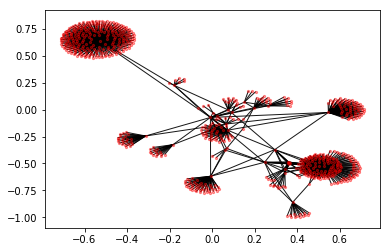

In [13]:
draw_graph(G2)

The interesting thing about this graph is that there are several subgraph structures. In other words, the graph is clustered around a few "highly collaborative clusters". These clusters _could_ signify a single lab or research group, where people work and publish together.


__Note:__ As seen in calculated network parameters, the average degree is fairly low (d = 2.56). Since, we have not created the links beyond second generation authorship, a fair assessment of the network would be to remove all nodes with degree d < 2 , and see the structure of the remaining network. Below, I have calculated graph F2 based on G2, where all d<2 nodes are removed.

160
Name: 
Type: Graph
Number of nodes: 160
Number of edges: 351
Average degree:   4.3875


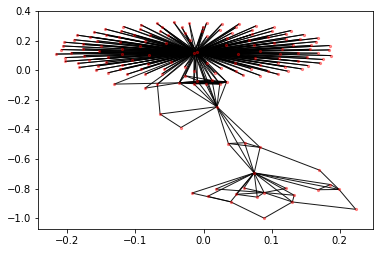

In [30]:
F2 = G2.copy()
remove = [node for node,degree in dict(F2.degree()).items() if degree < 2]
F2.remove_nodes_from(remove)
F2.remove_node('')

print(len(list(F2)))
draw_graph(F2)
print(nx.info(F2))

As seen, the majority of nodes have degree d = 1, and are removed. Now the average degree of nodes increases to d=4.5 which could be more representative of the typical sampling of the entire network. In other words, we could roughly expect that the averaage degree of nodes for the entire co-authorship network should be close to this value (d=4.5).

In [31]:
del(G2)

__Publication Graph:__
 In the next step, I cunstruct the Publication graph based on the publications and authorship set found for the previous part. Below, the function Publication_graph generates such graph.

In [16]:
def Publication_graph(sub_IDs, sub_links):
    sub_pubs = []
    for i in range(len(sub_IDs)):
        sub_pubs. append(DF['Publication_ID'][ID[sub_IDs[i]]])
    sub_Pubs = list(itertools.combinations(sub_pubs, 2))   
    sub_Links= list(itertools.combinations(sub_links, 2))

    Publication_Links = []
    for i in range(len(sub_Pubs)):
        if len(set(sub_Links[i][0]+sub_Links[i][1])) < len(set(sub_Links[i][0]))+len(set(sub_Links[i][1])):
            Publication_Links.append(sub_Pubs[i])
    return(Publication_Links, sub_Pubs)        

In [17]:
# nodes aare publications and links signify a common author between two given nodes (publications).
Publication_Links, sub_Pubs = Publication_graph(sub_IDs, sub_links)
#del(sub_IDs, sub_links)

Using the same procedure, we can generate the publication graph object (G) using _Networkx_ library:

In [22]:
G = corpus.Author_network(set(sub_Pubs), set(Publication_Links))
print(nx.info(G))
print("Average Clustering: " , nx.average_clustering(G))
N = corpus.connected_components_sizes(G)
#print("Connected Components: " , N)
#plt.hist(N,100)

Name: 
Type: Graph
Number of nodes: 13146
Number of edges: 1331
Average degree:   0.2025
Average Clustering:  0.01022910376270132


The first thing to notice is that the graph is very parse, due to its low average degree value. It basically suggests that we have many isolated nodes in the graph. Let's draw the graph to get a sense of its structure:

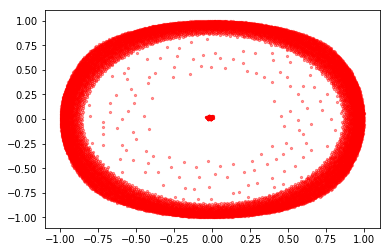

In [23]:
draw_graph(G)

__Note:__ As seen, except a very small fraction of nodes, the majority of nodes are not connected. We should keep in mind that we are only assessing a fraction of links since we only looking at subgroup of links. It is possible that if we process the entire network, these isolated nodes become connected through (unexplored) links (which is common author).

However, the connected part (shown in the middle of the graph) could be a very good approximation of the global behavior of the network. In order to study the properties of this sub-graph, we can remove all nodes with d = 0. Below, I have found the sub-grah assotiated with G, as graph F:

149
Name: 
Type: Graph
Number of nodes: 149
Number of edges: 1331
Average degree:  17.8658


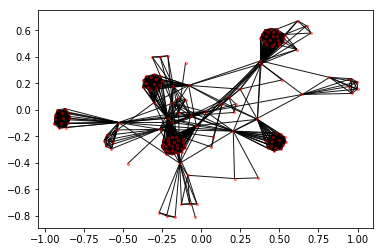

In [33]:
F = G.copy()
remove = [node for node,degree in dict(F.degree()).items() if degree < 1]
F.remove_nodes_from(remove)

print(len(list(F)))
draw_graph(F)
print(nx.info(F))

The interesting point about this subgraph is that it is highly connected (average d = 17.9). In other words, it seems that the entire publication network could be divided to many smaller clusters of (highly) connected regions. There are also several highly connected substructure. An interpretation is that the highly connected substructures could signify highly collaborative individuals (which is essense would be a lab or research group). And occational collaboration between these labs with keeps the whole structure connected. It is also very likely that we see common "research topics" for these publications (which could be interesting to check).

In [34]:
del(G)

In [36]:
# We can measure the small world coefficient for this graph (computationally extensive)
#nx.omega(F, niter=10 )

In [37]:
del(DF)

__Other Data Stories:__
An interesting analysis is to look at the trends in research based on year. For instance we can find the top 3 popular keyworks for a few consecutive years and see how this trend changes over time.

For that matter, I have extraxted all the keywords associated with each publication (entities) from the files and compared the most common keywords for a few years to see how the research trends are changing over time. 

Extracting keywork information from the files:

In [38]:
DF = corpus.data_load2()

In [39]:
def item_key(DF, year):
    keys = list(chain.from_iterable(DF['Entities'][DF['Year']==year]))
    item = []
    for i in range(len(list(set(keys)))):
        item.append(keys.count(list(set(keys))[i]))
    return(keys, item)

def n_high(keys, item):
    item2 = item [:]    
    print(list(set(keys))[int(np.where(np.array(item)==max(item2))[0])], max(item2))
    item2.remove(max(item))
    return(item2)

def n_high_topic(keys, item , n):
    item2=item[:]
    for i in range(n):
        item2 = n_high(keys, item2)

Now, I am extracting the top 5 keywords for each of the years 2000, 2008, and 2017 (Note that a subset of data is used for faster computation. Whether this is a proper sampling or not, could be subject to debate):

In [46]:
year = 2017
keys , item = item_key(DF[0:50000], year)
n_high_topic(keys, item , 5)
del(keys, item)

Patients 465
Neoplasms 157
Carbon dioxide measurement, partial pressure 92
Quantum field theory 85
Esophageal Neoplasms 63


In [49]:
year = 2008
keys , item = item_key(DF[0:90000], year)
n_high_topic(keys, item , 5)
del(keys, item)

Patients 483
Algorithm 177
Simulation 161
Neoplasms 131
National Cancer Program 98


In [53]:
year = 2000
keys , item = item_key(DF[0:160000], year)
n_high_topic(keys, item , 5)
del(keys, item)

Patients 496
Neoplasms 149
Craniosynostosis 91
CAV1 protein, human 70
keyhole-limpet hemocyanin 60


A quick review suggests that cancer research has persistently been a major trend over about two decades.

This is of course a very simplistic analysis, where I am only looking at the frequency of occurance for an exact phrase. A thorough search on trends should take into account the clusters of keywords which are associated with a specific research topic or field. Finding such clusters could incorporate machine learning algorithms.

__A few ideas on analysis of Semantic Scholar Open Research Corpus data:__

- We can create citation-based network (a directed graph) and find information about influence of certain topics on other topics. This analysis could be done by starting from a node and measuring the occurance of various keywords in certain distances from the node.

- One study could be analyzing collaboration clustering and understanding what influences them. Is it the topic of research (keywords), geographical closeness (if we had information on the country/city where the authors are located), or "influence" of the authors (one could imagine that giants of a field collaborate/ not collaborate often). 

- Another idea is to look at the dynamics of collaborations in time. We can implement this by creating colalboration graphs for each year and see how it evolves chronically. This way, we can identify "robust" collaborations vs. "temporary" collaborations. It is also interesting to know that whether authors participating in "long-term" and robust collaborations contribute to "significance" of their scientific production or not.


__Scalability:__
This is highly tied to the limits Networkx dictates in memory usage. Creating larger graphs is a problem if we want to analyze the network with this library. Alternative libraries such as graph-tool and igraph could be mplemented to avoid memory problems.

Another change that I would make (If I waned to write over my solution!) is to use DataFrame indexes consistently for both Author and Publication problems. This way, I can cut downb on multiple searches I peformed independently for both problems, and potentially other queries in the .json file)